# Process scans of death records of Curaçao

## 1. Count scans

In [1]:
import os
import re

In [2]:
data_dir = "../../data/Overlijden"

In [3]:
def count_files(dir_name):
    return len([file_name for file_name in os.listdir(dir_name)
                          if re.search("\.jpg$", file_name, re.IGNORECASE)])

In [4]:
def get_year_from_dir_name(dir_name):
    return int(re.sub("^.*(\d{4})$", "\\1", dir_name))

In [5]:
def count_scans(dir_name):
    counts = []
    for year_dir in sorted(os.listdir(dir_name)):
        if re.search("\d{4}$", year_dir):
            outside_count = 0
            city_count = 0
            for scan_dir in os.listdir(os.path.join(data_dir, year_dir)):
                scan_dir = os.path.join(data_dir, year_dir, scan_dir)
                if os.path.isdir(scan_dir):
                    if re.search("buiten", scan_dir, re.IGNORECASE):
                        outside_count += count_files(scan_dir)
                    elif re.search("stad", scan_dir, re.IGNORECASE):
                        city_count += count_files(scan_dir)
            counts.append((get_year_from_dir_name(year_dir), city_count, outside_count))
    return counts

In [6]:
def get_total(counts):
    return sum( [ int(x[2]) + int(x[1]) for x in counts ] )

In [7]:
counts = count_scans(data_dir)

In [8]:
get_total(counts)

72481

## 2. Visualize counts

In [9]:
import matplotlib.pyplot as plt

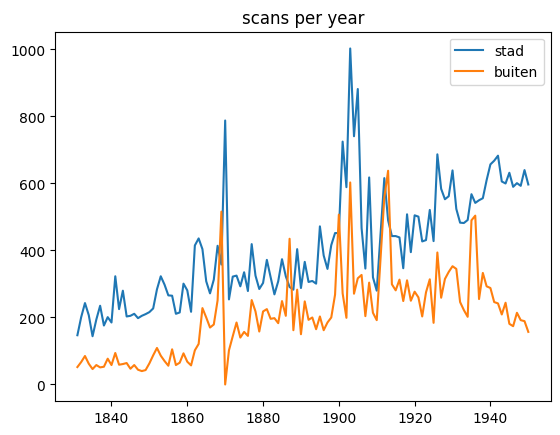

In [10]:
plt.title("scans per year")
plt.plot([x[0] for x in counts], [x[1] for x in counts], label="stad")
plt.plot([x[0] for x in counts], [x[2] for x in counts], label="buiten")
plt.legend()
plt.show()